In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

def process(text):
    text = re.sub(r'[\,\./;()"-\[\]]'," ",text)
    text = preprocess(text)
    text.sort()
    return(" ".join(text))

In [3]:
data = pd.read_table("data\\imdb-title-cast-rating-desc.tsv")
data = data[["title","genre","cast","rating","description"]].dropna()

In [4]:
# data['genre'] = data['genre'].map(lambda x : x.lower().replace(','," ").split())
# data['cast'] = data['cast'].map(lambda x : x.lower().split()[:5])
# data['description'] = data['description'].map(lambda x : process(x))

In [5]:
data['genre'] = data['genre'].map(lambda x : " ".join(sorted(x.lower().replace(','," ").split())))
data['cast'] = data['cast'].map(lambda x : " ".join(sorted(x.lower().replace("nm"," ").split()[:5])))
data['description'] = data['description'].map(lambda x : process(x))
data['desc_set'] = data["description"].map(lambda x: " ".join(set(x.lower().split())))

In [6]:
dd = data.copy()

dd = dd.apply(lambda x: x.astype("category").cat.codes)
dd["rating"] = data["rating"]

title        title          1.000000
genre        genre          1.000000
description  description    1.000000
rating       rating         1.000000
cast         cast           1.000000
desc_set     desc_set       1.000000
genre        cast           0.147246
cast         genre          0.147246
genre        description    0.075816
description  genre          0.075816
desc_set     description    0.061862
description  desc_set       0.061862
cast         description    0.050346
description  cast           0.050346
title        rating         0.018993
rating       title          0.018993
             description    0.005621
description  rating         0.005621
desc_set     title          0.004314
title        desc_set       0.004314
desc_set     rating         0.000951
rating       desc_set       0.000951
description  title         -0.005636
title        description   -0.005636
genre        title         -0.017826
title        genre         -0.017826
desc_set     genre         -0.021043
g

<AxesSubplot:>

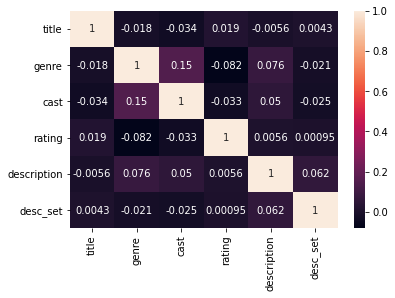

In [7]:
cm = dd.corr(method="pearson")
sorted_mat = cm.unstack().sort_values(ascending=False)
print(sorted_mat)
sns.heatmap(cm,annot=True)

title        title          1.000000
genre        genre          1.000000
description  description    1.000000
rating       rating         1.000000
cast         cast           1.000000
desc_set     desc_set       1.000000
genre        cast           0.100121
cast         genre          0.100121
genre        description    0.048188
description  genre          0.048188
desc_set     description    0.042690
description  desc_set       0.042690
cast         description    0.033259
description  cast           0.033259
title        rating         0.017208
rating       title          0.017208
title        desc_set       0.002885
desc_set     title          0.002885
rating       description    0.002642
description  rating         0.002642
desc_set     rating        -0.000659
rating       desc_set      -0.000659
description  title         -0.003657
title        description   -0.003657
genre        title         -0.011425
title        genre         -0.011425
genre        desc_set      -0.013953
d

<AxesSubplot:>

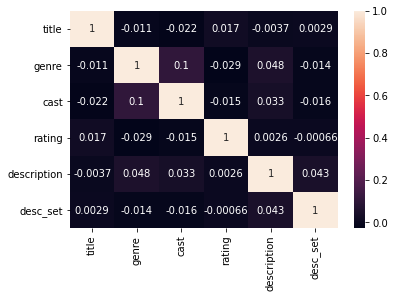

In [8]:
cm = dd.corr(method="kendall")
sorted_mat = cm.unstack().sort_values(ascending=False)
print(sorted_mat)
sns.heatmap(cm,annot=True)

title        title          1.000000
genre        genre          1.000000
description  description    1.000000
rating       rating         1.000000
cast         cast           1.000000
desc_set     desc_set       1.000000
genre        cast           0.148027
cast         genre          0.148027
genre        description    0.070892
description  genre          0.070892
desc_set     description    0.061877
description  desc_set       0.061877
cast         description    0.050382
description  cast           0.050382
title        rating         0.025474
rating       title          0.025474
title        desc_set       0.004304
desc_set     title          0.004304
rating       description    0.003886
description  rating         0.003886
desc_set     rating        -0.000971
rating       desc_set      -0.000971
description  title         -0.005616
title        description   -0.005616
genre        title         -0.016805
title        genre         -0.016805
genre        desc_set      -0.020625
d

<AxesSubplot:>

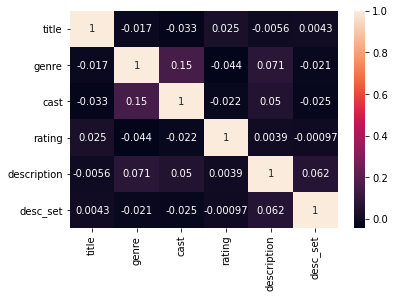

In [9]:
cm = dd.corr(method="spearman")
sorted_mat = cm.unstack().sort_values(ascending=False)
print(sorted_mat)
sns.heatmap(cm,annot=True)